In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


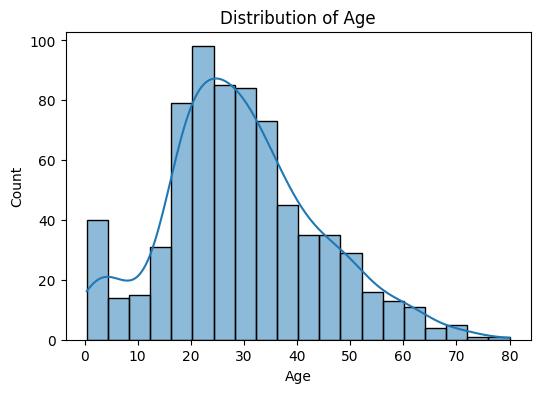

In [3]:
plt.figure(figsize=(6,4))
sns.histplot(df['age'].dropna(),bins=20,kde=True)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.show()

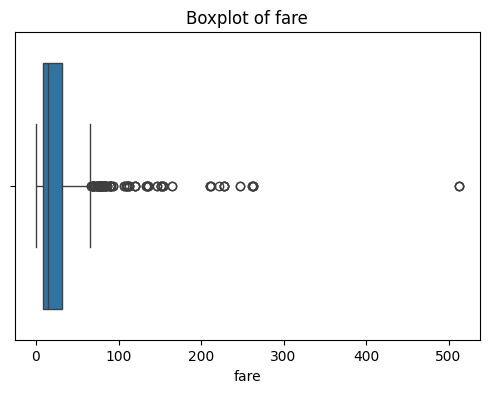

In [4]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['fare'])
plt.title("Boxplot of fare")
plt.show()

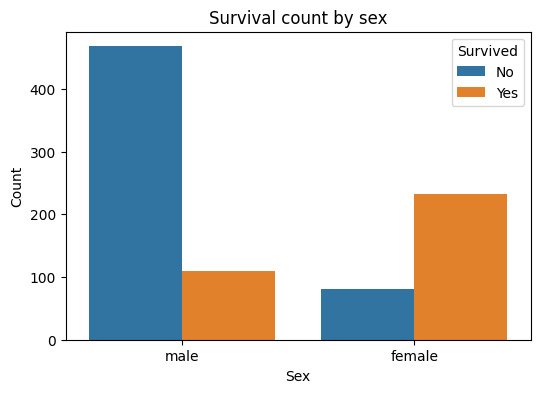

In [5]:
plt.figure(figsize=(6,4))
sns.countplot(x='sex', hue='survived', data=df)
plt.title("Survival count by sex")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.legend(title='Survived', labels=['No','Yes'])
plt.show()

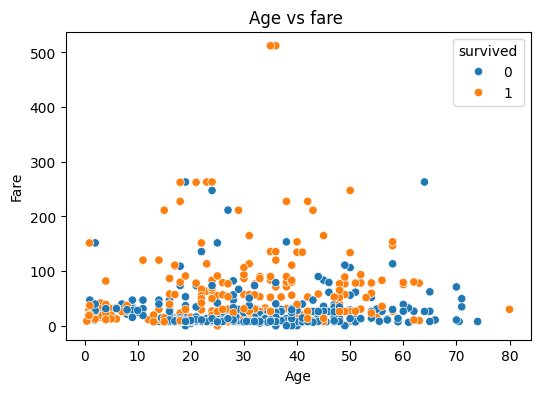

In [6]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='age',y='fare',hue='survived',data=df)
plt.title("Age vs fare ")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()

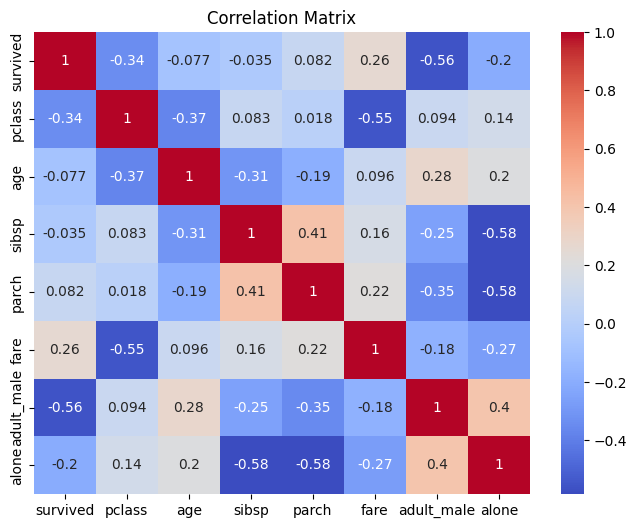

In [7]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [9]:
fare_pivot=df.pivot_table(index='pclass',values='fare',aggfunc='mean',margins=True)
print(fare_pivot)

             fare
pclass           
1       84.154687
2       20.662183
3       13.675550
All     32.204208


In [10]:
survived_pivot= df.pivot_table(index='sex',columns='pclass', values='survived',aggfunc='count',margins=True)
print(survived_pivot)

pclass    1    2    3  All
sex                       
female   94   76  144  314
male    122  108  347  577
All     216  184  491  891


In [11]:
with pd.ExcelWriter("titanic_pivot_tables.xlsx") as writer:
    fare_pivot.to_excel(writer, sheet_name='Average fare')
    survived_pivot.to_excel(writer, sheet_name='Survival count')